In [1]:
#loading essential libraries

import numpy as np
import pandas as pd

In [2]:
# Loading the excel file for the NBA cities

data = pd.read_excel('NBA_cities_data_for_model.xlsx')

# Check the first few rows of the data to ensure successful loading
print(data.head())


        city city_ascii  city_alt state_id      state_name  county_fips  \
0    Atlanta    Atlanta       NaN       GA         Georgia        13121   
1     Boston     Boston       NaN       MA   Massachusetts        25025   
2   Brooklyn   Brooklyn       NaN       NY        New York        36047   
3  Charlotte  Charlotte       NaN       NC  North Carolina        37119   
4    Chicago    Chicago       NaN       IL        Illinois        17031   

   county_name county_fips_all county_name_all      lat  ...  \
0       Fulton     13121|13089   Fulton|DeKalb  33.7628  ...   
1      Suffolk           25025         Suffolk  42.3188  ...   
2        Kings           36047           Kings  40.6501  ...   
3  Mecklenburg           37119     Mecklenburg  35.2083  ...   
4         Cook     17031|17043     Cook|DuPage  41.8375  ...   

   Followers (Twitter) (millions)    Arena Sponsor  Arena Cost (millions)  \
0                             1.5       State Farm                  213.5   
1         

In [3]:
#checking number of columns
len(data.columns)

103

In [4]:
#checking the number of rows and columns of the dataframe
data.shape

(30, 103)

## Creating new main target variable

In [5]:
# creating the main target variable
data['profits'] = data['022/2023 Revenue (millions)']-(data['022/2023 Player Expenses (millions)']+data['022/2023 Operating Income (millions)'])

In [6]:
#verifying the changes
data

,city,city_ascii,city_alt,state_id,state_name,county_fips,county_name,county_fips_all,county_name_all,lat,...,Arena Sponsor,Arena Cost (millions),Year of Arena Construction,Arena Capacity,Jersey Sponsor,022/2023 Revenue (millions),022/2023 Operating Income (millions),022/2023 Player Expenses (millions),2019 Ticket Revenue,profits
0,Atlanta,Atlanta,NaN,GA,Georgia,13121,Fulton,13121|13089,Fulton|DeKalb,33.7628,...,State Farm,213.5,1999,16600,YMCA,326,85,159,45.3,82
1,Boston,Boston,NaN,MA,Massachusetts,25025,Suffolk,25025,Suffolk,42.3188,...,TD Bank,160.0,1995,19156,Vistaprint,443,88,185,72.5,170
2,Brooklyn,Brooklyn,NaN,NY,New York,36047,Kings,36047,Kings,40.6501,...,Barclays Bank,1000.0,2012,17732,Webull,367,-5,187,55.1,185
3,Charlotte,Charlotte,NaN,NC,North Carolina,37119,Mecklenburg,37119,Mecklenburg,35.2083,...,Spectrum,260.0,2005,19077,Feastables,269,35,165,23.7,69
4,Chicago,Chicago,NaN,IL,Illinois,17031,Cook,17031|17043,Cook|DuPage,41.8375,...,United Airlines,175.0,1994,20917,Motorola,372,115,158,70.0,99
5,Cleveland,Cleveland,NaN,OH,Ohio,39035,Cuyahoga,39035,Cuyahoga,41.4764,...,Rocket Mortgage,100.0,1994,19432,Clevland-Cliffs Inc.,348,78,158,67.4,112
6,Dallas,Dallas,NaN,TX,Texas,48113,Dallas,48113|48397|48085|48257|48121,Dallas|Rockwall|Collin|Kaufman|Denton,32.7935,...,American Airlines,420.0,2001,19200,Chime,429,83,177,57.4,169
7,Denver,Denver,NaN,CO,Colorado,8031,Denver,8031,Denver,39.7620,...,Ball Corp,187.0,1999,19520,Ibotta,348,71,171,41.6,106
8,Detroit,Detroit,NaN,MI,Michigan,26163,Wayne,26163,Wayne,42.3834,...,Little Caesers,862.9,2017,20332,United Wholesale Mortgage,274,83,132,35.8,59
9,San Francisco,San Francisco,NaN,CA,California,6075,San Francisco,6075,San Francisco,37.7558,...,JPMorgan Chase,1400.0,2019,18064,Rakuten,765,79,197,100.4,489


In [7]:
#assigning all column names of the dataframe to a variable
col_names=list(data.columns)


In [8]:
# converting columns to numerical type (which we found to be inportant)
data['incorporated'] = data['incorporated'].astype(int)
data['cdp'] = data['cdp'].astype(int)
data['township'] = data['township'].astype(int)
data['military'] = data['military'].astype(int)

In [9]:
#checking and finding categorical columns
categorical_cols=[]
for col in col_names:
  if(str(data[col].dtype) not in ('float64','int64') ):
    categorical_cols.append(col)

In [10]:
categorical_cols

['city',
 'city_ascii',
 'state_id',
 'state_name',
 'county_name',
 'county_fips_all',
 'county_name_all',
 'source',
 'timezone',
 'zips',
 'cbsa_name',
 'cbsa_metro',
 'csa_name',
 'Team Name',
 'Arena Sponsor',
 'Jersey Sponsor']

Other unlisted columns ,that we found not useful are :


['city_alt',
'county_fips',
'county_name',
  'cbsa_fips',
   'csa_fips',
    'Year of Arena Construction']


In [11]:
#adding these not so useful columns to the categorical columns variable

other_cols= ['city_alt', 'county_fips', 'county_name', 'cbsa_fips', 'csa_fips', 'Year of Arena Construction','never_won','Arena Cost (millions)','id','lat','lng','Arena Capacity','Followers (Twitter) (millions)','veteran']
for x in other_cols:
  categorical_cols.append(x)

In [12]:
#verifying the changes
categorical_cols

['city',
 'city_ascii',
 'state_id',
 'state_name',
 'county_name',
 'county_fips_all',
 'county_name_all',
 'source',
 'timezone',
 'zips',
 'cbsa_name',
 'cbsa_metro',
 'csa_name',
 'Team Name',
 'Arena Sponsor',
 'Jersey Sponsor',
 'city_alt',
 'county_fips',
 'county_name',
 'cbsa_fips',
 'csa_fips',
 'Year of Arena Construction',
 'never_won',
 'Arena Cost (millions)',
 'id',
 'lat',
 'lng',
 'Arena Capacity',
 'Followers (Twitter) (millions)',
 'veteran']

In [13]:
# gathering only numerical columns of the dataframe
numerical_cols = list(set(col_names) - set(categorical_cols))

In [14]:
#verifying the changes
numerical_cols

['township',
 'education_bachelors',
 'age_over_80',
 'age_18_to_24',
 '022/2023 Revenue (millions)',
 'age_median',
 'age_50s',
 'disabled',
 'poverty',
 'ranking',
 'family_dual_income',
 'race_black',
 'male',
 'military',
 'widowed',
 'income_household_15_to_20',
 'age_40s',
 'incorporated',
 'age_20s',
 'income_household_100_to_150',
 'health_uninsured',
 'income_household_75_to_100',
 'income_household_20_to_25',
 'age_70s',
 'home_value',
 'education_graduate',
 'age_under_10',
 'rent_burden',
 'race_pacific',
 'age_over_65',
 'cdp',
 'income_household_150_over',
 'profits',
 'divorced',
 'income_household_35_to_50',
 'age_30s',
 'income_individual_median',
 'income_household_25_to_35',
 'income_household_50_to_75',
 'age_over_18',
 'age_60s',
 'education_college_or_above',
 'never_married',
 'income_household_under_5',
 'home_ownership',
 'hispanic',
 'family_size',
 'income_household_5_to_10',
 '022/2023 Player Expenses (millions)',
 'race_white',
 'population_proper',
 'educa

## Handling missing Values

We tried to manually fill the missing values from US government website:

https://data.census.gov/

We choose median for filling the remaining NA values.

In [15]:
for col in numerical_cols:
  if(data[col].isnull().any()):
    print(data[col].isna().sum())
    data[col].fillna(data[col].median(),inplace=True)

1
2
2
1
1
2
2
2
1
1
1
1
1
2
2
1
2
1
2
2


In [16]:
#verifying the changes
data

,city,city_ascii,city_alt,state_id,state_name,county_fips,county_name,county_fips_all,county_name_all,lat,...,Arena Sponsor,Arena Cost (millions),Year of Arena Construction,Arena Capacity,Jersey Sponsor,022/2023 Revenue (millions),022/2023 Operating Income (millions),022/2023 Player Expenses (millions),2019 Ticket Revenue,profits
0,Atlanta,Atlanta,NaN,GA,Georgia,13121,Fulton,13121|13089,Fulton|DeKalb,33.7628,...,State Farm,213.5,1999,16600,YMCA,326,85,159,45.3,82
1,Boston,Boston,NaN,MA,Massachusetts,25025,Suffolk,25025,Suffolk,42.3188,...,TD Bank,160.0,1995,19156,Vistaprint,443,88,185,72.5,170
2,Brooklyn,Brooklyn,NaN,NY,New York,36047,Kings,36047,Kings,40.6501,...,Barclays Bank,1000.0,2012,17732,Webull,367,-5,187,55.1,185
3,Charlotte,Charlotte,NaN,NC,North Carolina,37119,Mecklenburg,37119,Mecklenburg,35.2083,...,Spectrum,260.0,2005,19077,Feastables,269,35,165,23.7,69
4,Chicago,Chicago,NaN,IL,Illinois,17031,Cook,17031|17043,Cook|DuPage,41.8375,...,United Airlines,175.0,1994,20917,Motorola,372,115,158,70.0,99
5,Cleveland,Cleveland,NaN,OH,Ohio,39035,Cuyahoga,39035,Cuyahoga,41.4764,...,Rocket Mortgage,100.0,1994,19432,Clevland-Cliffs Inc.,348,78,158,67.4,112
6,Dallas,Dallas,NaN,TX,Texas,48113,Dallas,48113|48397|48085|48257|48121,Dallas|Rockwall|Collin|Kaufman|Denton,32.7935,...,American Airlines,420.0,2001,19200,Chime,429,83,177,57.4,169
7,Denver,Denver,NaN,CO,Colorado,8031,Denver,8031,Denver,39.7620,...,Ball Corp,187.0,1999,19520,Ibotta,348,71,171,41.6,106
8,Detroit,Detroit,NaN,MI,Michigan,26163,Wayne,26163,Wayne,42.3834,...,Little Caesers,862.9,2017,20332,United Wholesale Mortgage,274,83,132,35.8,59
9,San Francisco,San Francisco,NaN,CA,California,6075,San Francisco,6075,San Francisco,37.7558,...,JPMorgan Chase,1400.0,2019,18064,Rakuten,765,79,197,100.4,489


In [17]:
# Creating a function to split and return the dataframe into two dataframes: x and y
## y contains the target variable which is "profits" in our case.
## x contains all the other features

def create_x_and_y(colname):
  y = data[colname].copy()
  x=data[numerical_cols].copy()
  # len(x.columns)
  x= x.drop(colname, axis=1)
  # x= x.drop('id', axis=1)
  return x,y

In [18]:
# splitting the dataframe into two dataframes for ML models
x,y = create_x_and_y('profits')


In [19]:
#verifying the changes
x

,township,education_bachelors,age_over_80,age_18_to_24,022/2023 Revenue (millions),age_median,age_50s,disabled,poverty,ranking,...,income_household_median,race_multiple,female,population,density,race_other,race_asian,education_stem_degree,race_native,labor_force_participation
0,0,32.2,2.8,13.4,326,33.6,10.5,11.8,17.7,1,...,77655,4.70,50.6,5180179,1412.3,1.80,4.90,44.90,0.30,67.30
1,0,28.3,3.0,14.5,443,32.9,10.8,12.0,17.5,1,...,89212,12.00,51.8,4328315,5319.0,6.80,9.70,50.90,0.30,69.70
2,0,25.0,4.0,9.8,367,36.6,11.0,12.2,19.8,1,...,73951,8.67,52.0,2736074,15200.5,11.04,13.66,43.65,0.75,67.05
3,0,30.0,2.2,9.9,269,34.5,12.0,8.0,11.7,1,...,74070,7.10,51.5,1427444,1089.8,7.60,6.60,41.80,0.40,72.10
4,0,24.4,3.2,9.8,372,35.3,11.6,11.4,16.9,1,...,71673,9.70,51.2,8497759,4614.5,11.30,7.00,43.30,0.70,67.30
5,0,12.1,3.4,10.0,348,36.3,12.8,20.0,31.2,1,...,37271,8.20,51.2,1680247,1839.6,4.00,2.50,42.90,0.40,59.60
6,0,22.5,2.4,10.0,429,33.1,11.0,10.9,17.5,1,...,63985,13.10,50.1,5830932,1478.7,10.90,3.70,41.70,0.60,68.60
7,0,33.2,2.7,8.2,348,34.9,10.5,9.9,11.7,1,...,85853,12.70,49.5,2687458,1792.9,8.20,3.60,46.50,0.80,74.00
8,0,10.0,3.4,9.8,274,35.0,11.9,19.3,31.5,1,...,37761,3.80,52.4,3725908,1772.2,4.20,1.60,39.60,0.40,54.80
9,0,35.1,4.6,6.5,765,39.3,12.7,10.8,10.5,1,...,136689,9.50,48.5,3364979,7030.7,7.70,34.80,53.60,0.60,70.40


### Using min max scaling

In [20]:
# from re import X
# Using scikit-learn library to create ML model
from sklearn.preprocessing import MinMaxScaler

# Initializing the min max scaler function
scaler = MinMaxScaler()

# Doing Min-Max Scaling for x dataframe
scaler.fit(x)

# Transform the data to fit within the range [0, 1]
scaled_data = scaler.transform(x)

# Convert the numpy array back into a pandas DataFrame using the original column names and indices
x = pd.DataFrame(scaled_data, columns=x.columns, index=x.index)

# Dropping the columns which are obvious
## the columns from which target variable is created

x.drop('022/2023 Revenue (millions)',axis=1, inplace=True)
x.drop('022/2023 Operating Income (millions)',axis=1, inplace=True)
x.drop('022/2023 Player Expenses (millions)',axis=1, inplace=True)
x.drop('2019 Ticket Revenue',axis=1, inplace=True)

In [21]:
# verifying the Min-Max Scaling for x dataframe
x

,township,education_bachelors,age_over_80,age_18_to_24,age_median,age_50s,disabled,poverty,ranking,family_dual_income,...,income_household_median,race_multiple,female,population,density,race_other,race_asian,education_stem_degree,race_native,labor_force_participation
0,0.0,0.884462,0.214286,0.828829,0.157895,0.06,0.316667,0.358140,0.000000,0.570909,...,0.406204,0.061224,0.500000,0.273752,0.082548,0.073469,0.128280,0.400000,0.088235,0.651042
1,0.0,0.729084,0.285714,0.927928,0.096491,0.12,0.333333,0.348837,0.000000,0.887273,...,0.522451,0.309524,0.772727,0.228687,0.342496,0.277551,0.268222,0.813793,0.088235,0.776042
2,0.0,0.597610,0.642857,0.504505,0.421053,0.16,0.350000,0.455814,0.000000,0.656364,...,0.368947,0.196259,0.818182,0.144456,1.000000,0.450612,0.383673,0.313793,0.220588,0.638021
3,0.0,0.796813,0.000000,0.513514,0.236842,0.36,0.000000,0.079070,0.000000,0.716364,...,0.370144,0.142857,0.704545,0.075228,0.061089,0.310204,0.177843,0.186207,0.117647,0.901042
4,0.0,0.573705,0.357143,0.504505,0.307018,0.28,0.283333,0.320930,0.000000,0.669091,...,0.346034,0.231293,0.636364,0.449255,0.295619,0.461224,0.189504,0.289655,0.205882,0.651042
5,0.0,0.083665,0.428571,0.522523,0.394737,0.52,1.000000,0.986047,0.000000,0.127273,...,0.000000,0.180272,0.636364,0.088602,0.110980,0.163265,0.058309,0.262069,0.117647,0.250000
6,0.0,0.498008,0.071429,0.522523,0.114035,0.16,0.241667,0.348837,0.000000,0.654545,...,0.268704,0.346939,0.386364,0.308177,0.086966,0.444898,0.093294,0.179310,0.176471,0.718750
7,0.0,0.924303,0.178571,0.360360,0.271930,0.06,0.158333,0.079070,0.000000,0.970909,...,0.488664,0.333333,0.250000,0.141884,0.107873,0.334694,0.090379,0.510345,0.235294,1.000000
8,0.0,0.000000,0.428571,0.504505,0.280702,0.34,0.941667,1.000000,0.000000,0.000000,...,0.004929,0.030612,0.909091,0.196819,0.106496,0.171429,0.032070,0.034483,0.117647,0.000000
9,0.0,1.000000,0.857143,0.207207,0.657895,0.50,0.233333,0.023256,0.000000,0.967273,...,1.000000,0.224490,0.022727,0.177726,0.456390,0.314286,1.000000,1.000000,0.176471,0.812500


In [22]:
# Splitting the data into (80-20)% for training and test data
from sklearn.model_selection import train_test_split

# For `x` ->  feature set and `y` ->  target variable
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [23]:
# Joining the data to make complete training data
train_data = X_train.join(y_train)

0.03955458404401968
Feature: home_ownership, Score: 0.29486
Feature: education_less_highschool, Score: 0.21622
Feature: divorced, Score: 0.08670
Feature: density, Score: 0.05547
Feature: race_asian, Score: 0.03453
Feature: race_other, Score: 0.02799
Feature: rent_median, Score: 0.02687
Feature: income_household_75_to_100, Score: 0.02128
Feature: limited_english, Score: 0.01777
Feature: age_median, Score: 0.01734
Feature: population, Score: 0.01245
Feature: family_size, Score: 0.01202
Feature: income_household_median, Score: 0.01166
Feature: hispanic, Score: 0.01161
Feature: population_proper, Score: 0.01159
Feature: housing_units, Score: 0.01131
Feature: commute_time, Score: 0.00835
Feature: age_under_10, Score: 0.00664
Feature: education_some_college, Score: 0.00657
Feature: labor_force_participation, Score: 0.00594


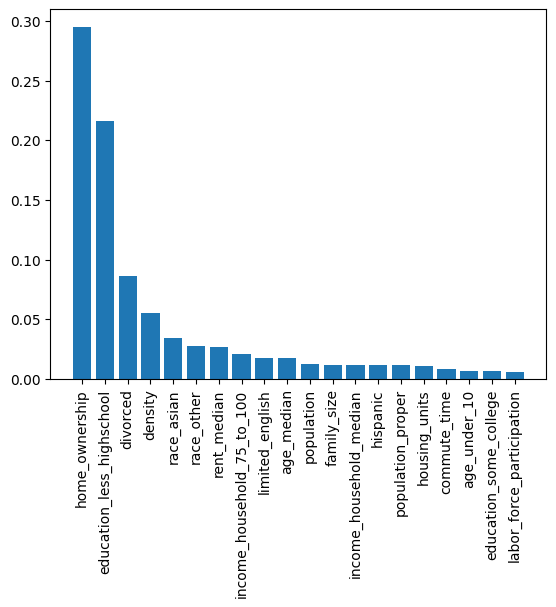

In [24]:
# Using the RandomForest ML model to find out the best features

from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

# define the model
model = RandomForestRegressor()

# fit the model
model.fit(X_train, y_train)

print(model.score(X_test,y_test))
# get importance
importance = model.feature_importances_

# get feature names
feature_names = x.columns.tolist()

# create a dictionary of feature names and their importance
importance_dict = dict(zip(feature_names, importance))

# sort the dictionary by importance score in descending order
sorted_importance = sorted(importance_dict.items(), key=lambda item: item[1], reverse=True)

# get the top 20 features
top_20_features = sorted_importance[:20]

# summarize feature importance
for i, (feature, importance) in enumerate(top_20_features):
 print('Feature: %s, Score: %.5f' % (feature, importance))

# plot feature importance
pyplot.bar([x for x in range(len(top_20_features))], [score for name, score in top_20_features])
pyplot.xticks([x for x in range(len(top_20_features))], [name for name, score in top_20_features], rotation='vertical')
pyplot.show()


In [25]:
# Using the GridSearch for creating more effective model

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

# tuning the hyperparameters

param_grid = {
    "n_estimators" : [40,50,30],
    # "min_samples_split" : [2,4,6,8],
    "max_depth" : [6,9,10]
}
scoring = make_scorer(mean_squared_error, greater_is_better=False)
grid_search = GridSearchCV(model, param_grid , cv=5 , scoring = scoring, return_train_score=True)

grid_search.fit(x,y)
best_model=grid_search.best_estimator_
best_model

RandomForestRegressor(max_depth=10, n_estimators=40)

In [26]:
# Checking the model accuracy
best_model.score(X_test,y_test)

0.8359034450979995

Feature: race_other, Score: 0.08433
Feature: education_bachelors, Score: 0.07814
Feature: home_ownership, Score: 0.07101
Feature: race_asian, Score: 0.05592
Feature: home_value, Score: 0.05472
Feature: income_household_35_to_50, Score: 0.04838
Feature: education_stem_degree, Score: 0.04815
Feature: education_college_or_above, Score: 0.04527
Feature: hispanic, Score: 0.04078
Feature: education_less_highschool, Score: 0.03984
Feature: income_household_six_figure, Score: 0.03732
Feature: density, Score: 0.03263
Feature: age_10_to_19, Score: 0.03104
Feature: family_size, Score: 0.03071
Feature: income_household_50_to_75, Score: 0.02623
Feature: rent_burden, Score: 0.02242
Feature: divorced, Score: 0.02227
Feature: rent_median, Score: 0.02217
Feature: income_household_75_to_100, Score: 0.02192
Feature: age_18_to_24, Score: 0.02048
Feature: limited_english, Score: 0.01888
Feature: male, Score: 0.01688
Feature: income_household_25_to_35, Score: 0.01679
Feature: age_over_80, Score: 0.01267
Fea

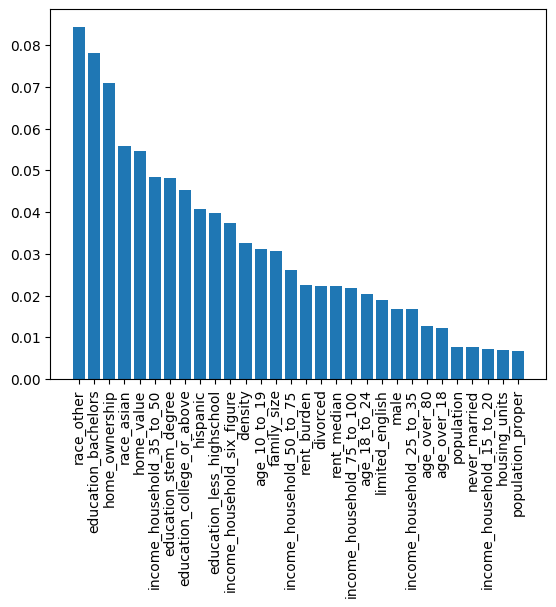

In [27]:
# get importance
importance = best_model.feature_importances_

# get feature names
feature_names = x.columns.tolist()

# create a dictionary of feature names and their importance
importance_dict = dict(zip(feature_names, importance))

# sort the dictionary by importance score in descending order
sorted_importance = sorted(importance_dict.items(), key=lambda item: item[1], reverse=True)

# get the top 20 features
top_30_features = sorted_importance[:30]

# summarize feature importance
for i, (feature, importance) in enumerate(top_30_features):
 print('Feature: %s, Score: %.5f' % (feature, importance))

# plot feature importance
pyplot.bar([x for x in range(len(top_30_features))], [score for name, score in top_30_features])
pyplot.xticks([x for x in range(len(top_30_features))], [name for name, score in top_30_features], rotation='vertical')
pyplot.show()


In [28]:
# Getting the list of top 20 most relevant features

top_30_feature_names = [name for name, score in top_30_features]
top_30_feature_names

['race_other',
 'education_bachelors',
 'home_ownership',
 'race_asian',
 'home_value',
 'income_household_35_to_50',
 'education_stem_degree',
 'education_college_or_above',
 'hispanic',
 'education_less_highschool',
 'income_household_six_figure',
 'density',
 'age_10_to_19',
 'family_size',
 'income_household_50_to_75',
 'rent_burden',
 'divorced',
 'rent_median',
 'income_household_75_to_100',
 'age_18_to_24',
 'limited_english',
 'male',
 'income_household_25_to_35',
 'age_over_80',
 'age_over_18',
 'population',
 'never_married',
 'income_household_15_to_20',
 'housing_units',
 'population_proper']

In [29]:
# finding out the instances which have the best values for these features
top_30_feature_names = [name for name, score in top_30_features]
best_rows = x[top_30_feature_names].idxmax()


best_rows_data = x.loc[best_rows]

In [30]:
best_rows_data.drop_duplicates(inplace=True)

In [31]:
# Rows that contain the best features
best_rows_data

,township,education_bachelors,age_over_80,age_18_to_24,age_median,age_50s,disabled,poverty,ranking,family_dual_income,...,income_household_median,race_multiple,female,population,density,race_other,race_asian,education_stem_degree,race_native,labor_force_participation
12,0.0,0.553785,0.428571,0.513514,0.412281,0.44,0.233333,0.306977,0.000000,0.800000,...,0.392012,0.333333,0.363636,0.630422,0.200482,1.000000,0.329446,0.255172,0.294118,0.609375
9,0.0,1.000000,0.857143,0.207207,0.657895,0.50,0.233333,0.023256,0.000000,0.967273,...,1.000000,0.224490,0.022727,0.177726,0.456390,0.314286,1.000000,1.000000,0.176471,0.812500
27,0.0,0.159363,0.571429,0.000000,1.000000,1.00,0.966667,0.297674,0.666667,0.305455,...,0.110805,0.000000,0.977273,0.000000,0.054921,0.000000,0.000000,0.565517,0.000000,0.156250
8,0.0,0.000000,0.428571,0.504505,0.280702,0.34,0.941667,1.000000,0.000000,0.000000,...,0.004929,0.030612,0.909091,0.196819,0.106496,0.171429,0.032070,0.034483,0.117647,0.000000
29,0.0,0.629482,0.285714,0.450450,0.263158,0.04,0.250000,0.237209,0.000000,0.796364,...,0.648283,0.142857,0.863636,0.270377,0.270414,0.187755,0.102041,0.986207,0.088235,0.895833
15,0.0,0.422311,1.000000,0.288288,0.692982,0.70,0.300000,0.465116,0.000000,0.596364,...,0.176900,1.000000,0.181818,0.321361,0.305227,0.261224,0.029155,0.400000,0.088235,0.572917
2,0.0,0.597610,0.642857,0.504505,0.421053,0.16,0.350000,0.455814,0.000000,0.656364,...,0.368947,0.196259,0.818182,0.144456,1.000000,0.450612,0.383673,0.313793,0.220588,0.638021
16,0.0,0.266932,0.142857,0.702703,0.000000,0.06,0.400000,0.646512,0.000000,0.338182,...,0.125350,0.238095,0.681818,0.068007,0.141721,0.297959,0.122449,0.193103,0.176471,0.479167
18,0.0,0.494024,0.428571,0.459459,0.535088,0.40,0.491667,0.600000,0.333333,0.425455,...,0.139260,0.081633,1.000000,0.049059,0.046231,0.089796,0.067055,0.172414,0.058824,0.333333
25,0.0,0.505976,0.392857,0.468468,0.298246,0.20,0.341667,0.223256,0.000000,0.694545,...,0.419270,0.346939,0.500000,0.103281,0.124940,0.522449,0.553936,0.606897,0.235294,0.510417


In [32]:
# finding out the ids of the best features rows
data['id']

0     1840013660
1     1840000455
2     1840034030
3     1840014557
4     1840000494
5     1840000596
6     1840019440
7     1840018789
8     1840003971
9     1840021543
10    1840020925
11    1840030084
12    1840020491
13    1840020491
14    1840015457
15    1840015149
16    1840003046
17    1840049248
18    1840001839
19    1840034016
20    1840020428
21    1840015099
22    1840000673
23    1840020568
24    1840019941
25    1840021491
26    1840022220
27    1840010407
28    1840021383
29    1840006060
Name: id, dtype: int64

## Applying these features for the main data file: us_city_data.xlsx

In [33]:
# Loading the original data file

original_us_cities_data = pd.read_excel('us_city_data.xlsx')

# Check the first few rows of the data to ensure successful loading
print(original_us_cities_data.head())

          city   city_ascii city_alt state_id  state_name  county_fips  \
0     New York     New York      NaN       NY    New York        36081   
1  Los Angeles  Los Angeles      NaN       CA  California         6037   
2      Chicago      Chicago      NaN       IL    Illinois        17031   
3        Miami        Miami      NaN       FL     Florida        12086   
4      Houston      Houston      NaN       TX       Texas        48201   

   county_name                county_fips_all  \
0       Queens  36081|36047|36085|36005|36061   
1  Los Angeles                           6037   
2         Cook                    17031|17043   
3   Miami-Dade                          12086   
4       Harris              48201|48157|48339   

                        county_name_all      lat  ...  poverty  \
0  Queens|Kings|Richmond|Bronx|New York  40.6943  ...     17.2   
1                           Los Angeles  34.1141  ...     16.6   
2                           Cook|DuPage  41.8375  ...     16.9

In [34]:
# Rows,Columns for the data
original_us_cities_data.shape

(109039, 91)

In [35]:
# Filling missing values with 0
for col in original_us_cities_data.columns:
  if(original_us_cities_data[col].isnull().any()):
    # print(original_us_cities_data[col].isna().sum())
    original_us_cities_data[col].fillna(0,inplace=True)

In [36]:
# original_us_cities_data = original_us_cities_data[~original_us_cities_data['state_id'].isin(['NY', 'CA'])]

In [37]:
# adding the id column in the top features
top_30_feature_names.append('id')

In [38]:
# removing the unrelevant columns and choosing only top_30_features of the US cities data

top_features_main_data = original_us_cities_data[top_30_feature_names].copy()
top_features_main_data

,race_other,education_bachelors,home_ownership,race_asian,home_value,income_household_35_to_50,education_stem_degree,education_college_or_above,hispanic,education_less_highschool,...,male,income_household_25_to_35,age_over_80,age_over_18,population,never_married,income_household_15_to_20,housing_units,population_proper,id
0,15.4,23.2,32.9,14.5,730421.0,9.0,43.9,40.2,29.0,16.7,...,48.1,6.7,3.9,79.4,18908608.0,44.0,3.7,3282804.0,8622467.0,1840034016
1,24.5,23.9,36.6,11.8,821581.0,9.7,42.8,36.7,48.1,21.3,...,50.0,7.2,3.4,80.3,11922389.0,46.4,3.3,1399442.0,3881041.0,1840020491
2,11.3,24.4,45.6,7.0,308874.0,9.8,43.3,42.4,29.0,13.4,...,48.8,7.6,3.2,80.0,8497759.0,48.9,3.6,1129908.0,2721914.0,1840000494
3,6.4,20.6,30.1,1.5,433122.0,11.0,44.9,34.2,72.3,21.2,...,50.8,9.3,5.0,83.5,6080145.0,40.7,5.2,186137.0,443665.0,1840015149
4,14.3,20.9,42.0,6.9,238773.0,12.7,50.3,35.1,44.8,20.4,...,49.7,9.7,2.7,76.1,5970127.0,42.1,3.9,897510.0,2296253.0,1840020925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1840045700
109035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1840087022
109036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1840153020
109037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1840153068


In [39]:
#Checking the data shape
top_features_main_data.shape

(109039, 31)

In [40]:
main_data = top_features_main_data[~top_features_main_data['id'].isin(data['id'])]
main_data

,race_other,education_bachelors,home_ownership,race_asian,home_value,income_household_35_to_50,education_stem_degree,education_college_or_above,hispanic,education_less_highschool,...,male,income_household_25_to_35,age_over_80,age_over_18,population,never_married,income_household_15_to_20,housing_units,population_proper,id
12,2.6,37.3,44.5,16.8,879805.0,6.6,56.7,66.6,7.5,4.4,...,51.1,4.4,3.0,86.0,3561397.0,46.0,2.2,345246.0,734603.0,1840021117
14,8.5,28.4,47.6,17.4,782343.0,7.4,55.8,48.7,30.1,10.3,...,51.0,5.4,3.3,81.0,3046560.0,40.3,2.3,515475.0,1383987.0,1840021990
15,4.5,32.1,48.1,5.2,327692.0,9.8,46.8,53.5,9.9,9.2,...,51.2,6.8,2.1,80.9,2892569.0,51.7,3.4,185674.0,426877.0,1840007830
16,4.5,25.7,50.5,4.6,331760.0,11.7,45.2,43.3,26.7,11.0,...,49.9,8.1,3.1,79.2,2861173.0,42.2,4.0,157066.0,388768.0,1840015982
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2405464.0,0.0,0.0,0.0,2405464.0,1840034002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1840045700
109035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1840087022
109036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1840153020
109037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1840153068


In [41]:
# # removing the id column

main_data.drop('id',axis=1,inplace=True)

<ipython-input-41-12cbf8e1876c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_data.drop('id',axis=1,inplace=True)


In [42]:
# # verifying the changes

main_data.shape

(109010, 30)

## Using clustering to find the cities that have closest features to the NBA cities

In [43]:
# Creating the training data for clustering

training_data_for_clustering = data[top_30_feature_names]
training_data_for_clustering.drop('id',axis=1,inplace=True)
training_data_for_clustering

<ipython-input-43-63882937f4c6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data_for_clustering.drop('id',axis=1,inplace=True)


,race_other,education_bachelors,home_ownership,race_asian,home_value,income_household_35_to_50,education_stem_degree,education_college_or_above,hispanic,education_less_highschool,...,limited_english,male,income_household_25_to_35,age_over_80,age_over_18,population,never_married,income_household_15_to_20,housing_units,population_proper
0,1.80,32.2,45.7,4.90,392158.0,8.3,44.90,57.2,5.40,7.1,...,2.0,49.4,6.6,2.8,82.8,5180179,55.0,3.80,227388,494838
1,6.80,28.3,34.8,9.70,684963.0,7.0,50.90,53.4,19.60,11.6,...,11.2,48.2,5.4,3.0,84.3,4328315,55.4,3.40,276053,665945
2,11.04,25.0,29.5,13.66,320669.0,11.0,43.65,42.4,64.61,22.7,...,2.5,48.0,7.7,4.0,86.0,2736074,44.9,3.65,1077654,2736074
3,7.60,30.0,52.1,6.60,312137.0,11.8,41.80,46.6,15.30,10.3,...,5.2,48.5,7.4,2.2,77.1,1427444,42.3,2.80,354442,875045
4,11.30,24.4,45.6,7.00,308874.0,9.8,43.30,42.4,29.00,13.4,...,7.9,48.8,7.6,3.2,80.0,8497759,48.9,3.60,1129908,2721914
5,4.00,12.1,40.9,2.50,85927.0,13.7,42.90,20.3,12.50,17.1,...,3.8,48.8,11.6,3.4,78.8,1680247,53.9,7.40,167829,370365
6,10.90,22.5,41.9,3.70,276687.0,12.5,41.70,36.6,42.40,19.8,...,9.3,49.9,8.6,2.4,75.6,5830932,42.8,3.10,521147,1300642
7,8.20,33.2,49.4,3.60,540061.0,9.3,46.50,54.3,29.20,9.5,...,3.4,50.5,5.9,2.7,81.3,2687458,43.9,2.70,322964,710800
8,4.20,10.0,48.8,1.60,69898.0,15.3,39.60,16.9,7.50,17.2,...,2.3,47.6,11.0,3.4,75.4,3725908,56.5,6.30,249518,636787
9,7.70,35.1,38.6,34.80,1347059.0,5.2,53.60,59.8,15.50,11.2,...,10.9,51.5,4.2,4.6,86.4,3364979,45.7,2.40,360842,851036


In [44]:
# concatenating nba cities and 100 predicted cities
df_combined = pd.concat([training_data_for_clustering, main_data])#, ignore_index=True)


In [45]:
df_combined

,race_other,education_bachelors,home_ownership,race_asian,home_value,income_household_35_to_50,education_stem_degree,education_college_or_above,hispanic,education_less_highschool,...,limited_english,male,income_household_25_to_35,age_over_80,age_over_18,population,never_married,income_household_15_to_20,housing_units,population_proper
0,1.80,32.2,45.7,4.90,392158.0,8.3,44.90,57.2,5.40,7.1,...,2.0,49.4,6.6,2.8,82.8,5180179.0,55.0,3.80,227388.0,494838.0
1,6.80,28.3,34.8,9.70,684963.0,7.0,50.90,53.4,19.60,11.6,...,11.2,48.2,5.4,3.0,84.3,4328315.0,55.4,3.40,276053.0,665945.0
2,11.04,25.0,29.5,13.66,320669.0,11.0,43.65,42.4,64.61,22.7,...,2.5,48.0,7.7,4.0,86.0,2736074.0,44.9,3.65,1077654.0,2736074.0
3,7.60,30.0,52.1,6.60,312137.0,11.8,41.80,46.6,15.30,10.3,...,5.2,48.5,7.4,2.2,77.1,1427444.0,42.3,2.80,354442.0,875045.0
4,11.30,24.4,45.6,7.00,308874.0,9.8,43.30,42.4,29.00,13.4,...,7.9,48.8,7.6,3.2,80.0,8497759.0,48.9,3.60,1129908.0,2721914.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109034,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
109035,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
109036,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
109037,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0


In [46]:
# Using KMeans clustering

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Using Elbow method to calculate the value of 'k'
# Calculate the Within-Cluster-Sum of Squared Errors (WSS) for different values of k

def find_K(df_combined):
  wss = []
  for i in range(1, 11):
      kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
      kmeans.fit(df_combined)
      wss.append(kmeans.inertia_)

  # Calculate the rate of change (slope) between each point
  slopes = [wss[i] - wss[i-1] for i in range(1, len(wss))]

  # Find the index of the largest slope
  elbow = slopes.index(max(slopes)) + 1

  # Plot the Elbow Method graph
  plt.plot(range(1, 11), wss)
  plt.title('Elbow Method')
  plt.xlabel('Number of clusters')
  plt.ylabel('WSS')
  plt.show()

  return elbow



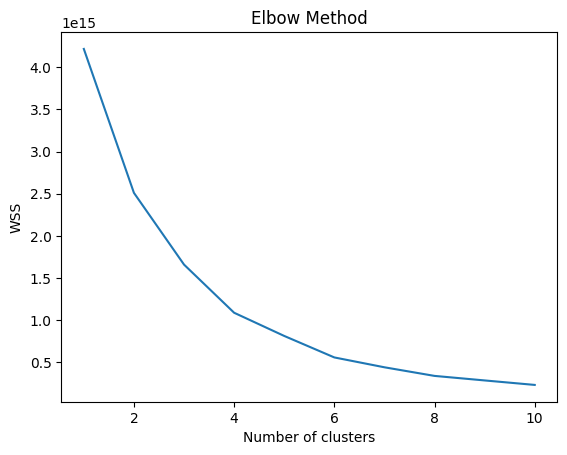

9

In [47]:
no_of_clusters = find_K(df_combined)
no_of_clusters

In [48]:

# implementing KMeans for the first time

kmeans = KMeans(n_clusters=no_of_clusters)
kmeans.fit(df_combined)
clusters = kmeans.predict(df_combined)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [49]:
clusters

array([2, 2, 7, ..., 0, 0, 0], dtype=int32)

In [50]:
#assigning the clusters to the dataframe via creating a new column
df_combined['cluster']=clusters

In [51]:
# total number of unique clusters
df_combined['cluster'].unique()

array([2, 7, 5, 4, 1, 6, 3, 0, 8], dtype=int32)

In [52]:
df_combined.value_counts(df_combined['cluster'])

cluster
0    83915
4    14642
1     6775
6     2589
3      808
8      253
7       45
2       10
5        3
Name: count, dtype: int64

In [53]:
# splitting the training data and US cities data for final clustering
clustered_training_data = df_combined[:30]
remaining_data = df_combined[30:]

In [54]:
clustered_training_data.value_counts(clustered_training_data['cluster'])
# clustered_training_data

cluster
7    16
2    10
5     3
4     1
Name: count, dtype: int64

In [55]:
# finding the cluster which has maximum original NBA cities
max_value = clustered_training_data['cluster'].value_counts().max()
max_cluster = clustered_training_data['cluster'].value_counts().idxmax()
print(max_cluster)

7


In [56]:
remaining_data.value_counts(remaining_data['cluster'])


cluster
0    83915
4    14641
1     6775
6     2589
3      808
8      253
7       29
Name: count, dtype: int64

In [57]:
remaining_data

,race_other,education_bachelors,home_ownership,race_asian,home_value,income_household_35_to_50,education_stem_degree,education_college_or_above,hispanic,education_less_highschool,...,male,income_household_25_to_35,age_over_80,age_over_18,population,never_married,income_household_15_to_20,housing_units,population_proper,cluster
12,2.6,37.3,44.5,16.8,879805.0,6.6,56.7,66.6,7.5,4.4,...,51.1,4.4,3.0,86.0,3561397.0,46.0,2.2,345246.0,734603.0,7
14,8.5,28.4,47.6,17.4,782343.0,7.4,55.8,48.7,30.1,10.3,...,51.0,5.4,3.3,81.0,3046560.0,40.3,2.3,515475.0,1383987.0,7
15,4.5,32.1,48.1,5.2,327692.0,9.8,46.8,53.5,9.9,9.2,...,51.2,6.8,2.1,80.9,2892569.0,51.7,3.4,185674.0,426877.0,7
16,4.5,25.7,50.5,4.6,331760.0,11.7,45.2,43.3,26.7,11.0,...,49.9,8.1,3.1,79.2,2861173.0,42.2,4.0,157066.0,388768.0,7
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2405464.0,0.0,0.0,0.0,2405464.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
109035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
109036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
109037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [58]:
# finding the indexes of the best cluster rows
indices = remaining_data[remaining_data['cluster'] == max_cluster].index
indices

Index([12, 14, 15, 16, 19, 20, 21, 22, 23, 27, 29, 30, 31, 33, 34, 35, 37, 38,
       39, 42, 43, 44, 46, 47, 51, 54, 56, 57, 60],
      dtype='int64')

In [59]:
final_result = original_us_cities_data.loc[indices]
final_result

,city,city_ascii,city_alt,state_id,state_name,county_fips,county_name,county_fips_all,county_name_all,lat,...,poverty,limited_english,commute_time,health_uninsured,veteran,cbsa_fips,cbsa_name,cbsa_metro,csa_fips,csa_name
12,Seattle,Seattle,0,WA,Washington,53033,King,53033,King,47.6211,...,10.1,4.8,27.2,4.5,3.8,42660.0,"Seattle-Tacoma-Bellevue, WA",True,500.0,"Seattle-Tacoma, WA"
14,San Diego,San Diego,0,CA,California,6073,San Diego,6073,San Diego,32.8313,...,11.4,6.6,24.0,6.9,7.0,41740.0,"San Diego-Chula Vista-Carlsbad, CA",True,0.0,0
15,Minneapolis,Minneapolis,0,MN,Minnesota,27053,Hennepin,27053,Hennepin,44.9635,...,16.8,4.5,22.9,6.0,3.5,33460.0,"Minneapolis-St. Paul-Bloomington, MN-WI",True,378.0,"Minneapolis-St. Paul, MN-WI"
16,Tampa,Tampa,0,FL,Florida,12057,Hillsborough,12057,Hillsborough,27.9945,...,16.8,7.2,24.8,11.2,6.4,45300.0,"Tampa-St. Petersburg-Clearwater, FL",True,0.0,0
19,Queens,Queens,0,NY,New York,36081,Queens,36081,Queens,40.7498,...,0.0,0.0,0.0,0.0,0.0,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",True,408.0,"New York-Newark, NY-NJ-CT-PA"
20,Riverside,Riverside,0,CA,California,6065,Riverside,6065,Riverside,33.9381,...,12.8,6.7,31.3,9.2,4.2,40140.0,"Riverside-San Bernardino-Ontario, CA",True,348.0,"Los Angeles-Long Beach, CA"
21,Las Vegas,Las Vegas,0,NV,Nevada,32003,Clark,32003,Clark,36.2333,...,14.7,6.4,25.9,13.1,8.2,29820.0,"Las Vegas-Henderson-Paradise, NV",True,332.0,"Las Vegas-Henderson, NV"
22,Baltimore,Baltimore,0,MD,Maryland,24510,Baltimore,24510,Baltimore,39.3051,...,19.6,2.0,30.1,5.5,5.3,12580.0,"Baltimore-Columbia-Towson, MD",True,548.0,"Washington-Baltimore-Arlington, DC-MD-VA-WV-PA"
23,St. Louis,St. Louis,Saint Louis,MO,Missouri,29510,St. Louis,29510,St. Louis,38.6359,...,20.2,1.8,23.0,10.1,5.9,41180.0,"St. Louis, MO-IL",True,476.0,"St. Louis-St. Charles-Farmington, MO-IL"
27,Austin,Austin,0,TX,Texas,48453,Travis,48453|48491|48209,Travis|Williamson|Hays,30.3005,...,12.4,5.6,24.1,12.8,4.2,12420.0,"Austin-Round Rock-Georgetown, TX",True,0.0,0


In [60]:
list(final_result['city'])

['Seattle',
 'San Diego',
 'Minneapolis',
 'Tampa',
 'Queens',
 'Riverside',
 'Las Vegas',
 'Baltimore',
 'St. Louis',
 'Austin',
 'San Juan',
 'San Jose',
 'Pittsburgh',
 'Manhattan',
 'Cincinnati',
 'Kansas City',
 'Columbus',
 'Bronx',
 'Virginia Beach',
 'Providence',
 'Jacksonville',
 'Nashville',
 'Raleigh',
 'Richmond',
 'Louisville',
 'Fort Worth',
 'Tucson',
 'El Paso',
 'Hempstead']

In [61]:
results = set(final_result['city'])
ids = (final_result['id'])

# running the Kmeans algorithm 100 times to get stable results

for i in range(100):
  kmeans = KMeans(n_clusters=no_of_clusters)
  kmeans.fit(df_combined)
  clusters = kmeans.predict(df_combined)
  df_combined['cluster']=clusters
  clustered_training_data = df_combined[:30]
  remaining_data = df_combined[30:]
  max_value = clustered_training_data['cluster'].value_counts().max()
  max_cluster = clustered_training_data['cluster'].value_counts().idxmax()
  indices = remaining_data[remaining_data['cluster'] == max_cluster].index
  final_result = original_us_cities_data.loc[indices]
  ids  = results.union(set(final_result['city']))
  results = results.union(set(final_result['city']))

print(results)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

{'Jacksonville', 'Kansas City', 'Nashville', 'Baltimore', 'Las Vegas', 'San Juan', 'San Jose', 'Bridgeport', 'Fresno', 'Fort Worth', 'Louisville', 'Manhattan', 'Raleigh', 'El Paso', 'Minneapolis', 'Riverside', 'Hempstead', 'Virginia Beach', 'Cincinnati', 'Providence', 'Columbus', 'Pittsburgh', 'St. Louis', 'Tampa', 'Seattle', 'Richmond', 'Tucson', 'Bronx', 'Hartford', 'Omaha', 'Austin', 'San Diego', 'Tulsa', 'Buffalo', 'Albuquerque', 'Queens'}


In [62]:
# Writing the final results to CSV
final_result.to_csv('recommended_cities.csv', index=False)